In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression,SGDRegressor

In [4]:
from sklearn.metrics import r2_score


In [5]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [6]:
from sklearn.pipeline import Pipeline

In [8]:
#data generation for displaying polynomial regression
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

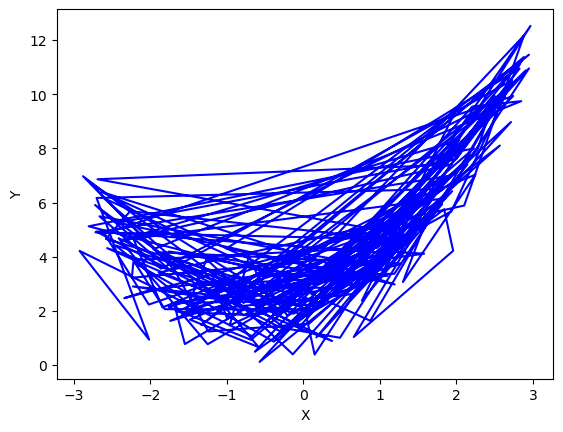

In [9]:
plt.plot(X,y,'b')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred=lr.predict(X_test)

In [13]:
r2_score(y_test,y_pred)

0.4103004889119397

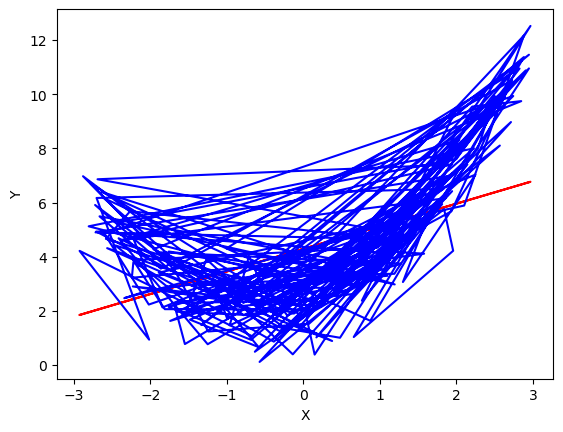

In [14]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [15]:
#applying polynomial linear Regression
poly=PolynomialFeatures(degree=2)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [16]:
X_train[0]


array([0.58377918])

In [17]:
X_train_trans[0]

array([1.        , 0.58377918, 0.34079813])

In [18]:
model=LinearRegression()

In [19]:
model.fit(X_train_trans,y_train)

LinearRegression()

In [20]:
y_pred=model.predict(X_test_trans)

In [21]:
r2_score(y_test,y_pred)

0.9499418244933346

In [22]:
model.coef_

array([[0.        , 0.87080588, 0.77668007]])

In [23]:
model.intercept_

array([2.0727238])

In [24]:
#less degree makes underfitting 
#more degree than required then it makes overfitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data=pd.read_csv('housing.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [24]:
data=data.dropna(subset=["total_bedrooms"])

In [25]:
X=data[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]]

In [26]:
y=data["median_house_value"]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
model=LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(X_test)

In [31]:
r2_score(y_test,y_pred)

0.6400865688993742

In [32]:
sgd=SGDRegressor()

In [33]:
sgd.fit(X_train,y_train)

SGDRegressor()

In [35]:
y_pred=sgd.predict(X_test)

In [36]:
r2_score(y_test,y_pred)

-4.913062309188594e+19

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly=PolynomialFeatures(degree=2)

In [40]:
X_train_trans=poly.fit_transform(X_train)

In [41]:
X_test_trans=poly.transform(X_test)

In [43]:
model=LinearRegression()

In [44]:
model.fit(X_train_trans,y_train)

LinearRegression()

In [45]:
y_pred=model.predict(X_test_trans)

In [47]:
#better than LinearRegresssion
r2_score(y_test,y_pred)

0.6982497150779168

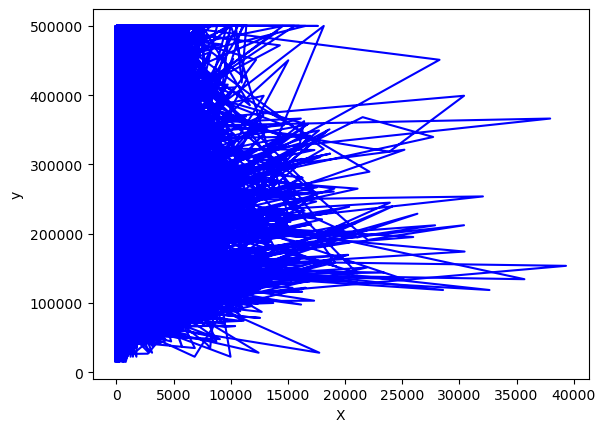

In [48]:
plt.plot(X,y,color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

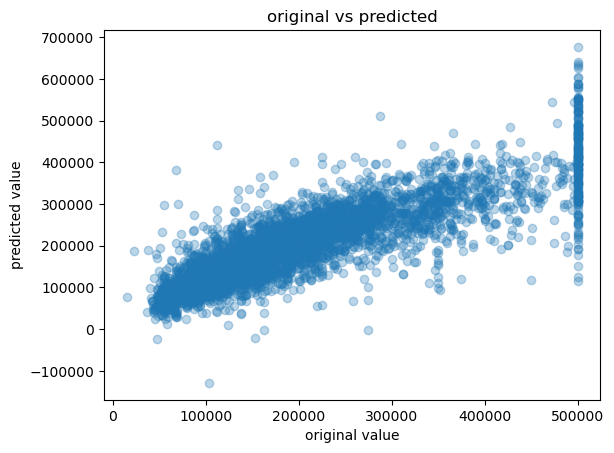

In [49]:
plt.scatter(y_test,y_pred,alpha=0.3)
plt.xlabel("original value")
plt.ylabel("predicted value")
plt.title("original vs predicted")
plt.show()

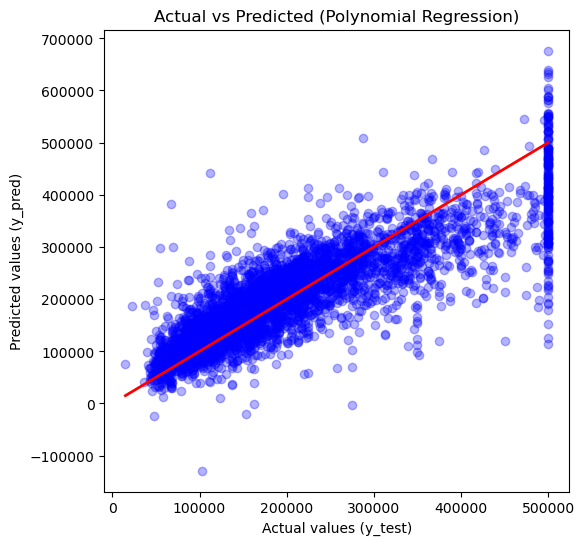

In [52]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)  
plt.xlabel("Actual values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.show()
#You plotted predictions only at your test points, which are unordered → Matplotlib drew a line through them in the given order.
